# Q2

(45%) Please design a neural net to predict network intrusion types for the datasets “train_DefenseSystem.csv” and “test_DefenseSystem.csv.” Please read the dataset description in the file “DefenseSystem_Readme.docx.”
<br>



## About the dataset
- train_DefenseSystem.csv: a training dataset that contains 5,000 data samples.
- test_DefenseSystem.csv: a test dataset that contains 1,020 data samples.
- Target Prediction Field：**event_rule_category** with only two classes: “Access Control” and “Web Attack.”
<br>

1.	device_dev_name
2.	device_family_name
3.	device_hashed_mac
4.	device_os_name
5.	device_type_name
6.	device_vendor_name
7.	event_protocol_id: PROTOCOL number (1:ICMP, 6:TCP, 17:UDP,...)
8.	event_flow_outbound_or_inbound : When an event was triggered, is it outbound or inbound? (It is used to judge whether it attacked or was attacked) 
9.	event_role_device_or_router: Is the device where the event was triggered just a device or router?
10.	event_role_server_or_client: Is the device where the event was triggered a server or client?
11.	event_rule_id
12.	event_rule_name
13.	event_rule_reference
14.	event_rule_severity: severity scale ranges from 1 to 5.
15.	event_self_ipv4: Device IP address where the event was triggered. Mostly, it would be a private IP; however, if it is a public IP, it has been obfuscated to avoid possible connections to any real-world IPs and misunderstanding.(IP)
16.	event_time 
17.	router_ip: It is also obfuscated and is only used for indicating same router sources. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'DefenseSystem_Readme.docx',
 'model.png',
 'model1',
 'model1 loss.jpg',
 'model2',
 'model3',
 'model_res_test.csv',
 'Q2.ipynb',
 'Q3_logs',
 'test_DefenseSystem.csv',
 'Train2_acc.jpg',
 'Train2_loss.jpg',
 'Train3_acc.jpg',
 'Train3_loss.jpg',
 'Train_acc.jpg',
 'train_DefenseSystem.csv',
 'Train_loss.jpg']

In [3]:
train=pd.read_csv('train_DefenseSystem.csv')
test=pd.read_csv('test_DefenseSystem.csv')
# train['source']=0
# test['source']=1
train_y=pd.get_dummies(train['event_rule_category'])['Web Attack'].astype('category')
train=train.drop(['event_rule_category',], axis=1)
train_test_con=pd.concat([train,test])
train_test_con=train_test_con.drop(['device_hashed_mac','event_time'], axis=1)

In [4]:
train_test_con[4999:5003]

,device_dev_name,device_family_name,device_os_name,device_type_name,device_vendor_name,event_protocol_id,event_flow_outbound_or_inbound,event_role_device_or_router,event_role_server_or_client,event_rule_id,event_rule_name,event_rule_reference,event_rule_severity,event_self_ipv4,router_ip
4999,Windows,Computer,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.2.188,207.180.62.141
0,Nokia Internet Tablet,Handheld,Maemo,PDA,Maemo,6,outbound,device,client,1056078,WEB Hashtable Collisions,CVE-2011-3414; CVE-2011-5034; CVE-2011-5035; C...,5,192.168.11.142,171.186.84.152
1,Windows,Computer,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1059684,EXPLOIT Bitcoin/LiteCoin/Dogecoin Mining Activ...,CVE-2014-unknown; http://mining.bitcoin.cz/str...,4,192.168.2.130,46.80.199.99
2,Windows,Computer,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1059684,EXPLOIT Bitcoin/LiteCoin/Dogecoin Mining Activ...,CVE-2014-unknown; http://mining.bitcoin.cz/str...,4,192.168.3.53,167.105.79.243


In [5]:
train.isnull().sum(axis = 0)


device_dev_name                   0
device_family_name                0
device_hashed_mac                 0
device_os_name                    0
device_type_name                  0
device_vendor_name                0
event_protocol_id                 0
event_flow_outbound_or_inbound    0
event_role_device_or_router       0
event_role_server_or_client       0
event_rule_id                     0
event_rule_name                   0
event_rule_reference              0
event_rule_severity               0
event_self_ipv4                   0
event_time                        0
router_ip                         0
dtype: int64

In [6]:
test.isnull().sum(axis = 0)

device_dev_name                   0
device_family_name                0
device_hashed_mac                 0
device_os_name                    0
device_type_name                  0
device_vendor_name                0
event_protocol_id                 0
event_flow_outbound_or_inbound    0
event_role_device_or_router       0
event_role_server_or_client       0
event_rule_id                     0
event_rule_name                   0
event_rule_reference              0
event_rule_severity               0
event_self_ipv4                   0
event_time                        0
router_ip                         0
dtype: int64

In [7]:
train_test_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6020 entries, 0 to 1019
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   device_dev_name                 6020 non-null   object
 1   device_family_name              6020 non-null   object
 2   device_os_name                  6020 non-null   object
 3   device_type_name                6020 non-null   object
 4   device_vendor_name              6020 non-null   object
 5   event_protocol_id               6020 non-null   int64 
 6   event_flow_outbound_or_inbound  6020 non-null   object
 7   event_role_device_or_router     6020 non-null   object
 8   event_role_server_or_client     6020 non-null   object
 9   event_rule_id                   6020 non-null   int64 
 10  event_rule_name                 6020 non-null   object
 11  event_rule_reference            6020 non-null   object
 12  event_rule_severity             6020 non-null   

In [8]:
train_test_con.describe()

,event_protocol_id,event_rule_id,event_rule_severity
count,6020.000000,6.020000e+03,6020.000000
mean,6.420100,1.080949e+06,4.361296
std,2.116422,3.629858e+04,0.480416
min,0.000000,1.049802e+06,4.000000
25%,6.000000,1.050015e+06,4.000000
50%,6.000000,1.056720e+06,4.000000
75%,6.000000,1.130593e+06,5.000000
max,17.000000,1.132896e+06,5.000000


In [9]:
train_test_con.head()

,device_dev_name,device_family_name,device_os_name,device_type_name,device_vendor_name,event_protocol_id,event_flow_outbound_or_inbound,event_role_device_or_router,event_role_server_or_client,event_rule_id,event_rule_name,event_rule_reference,event_rule_severity,event_self_ipv4,router_ip
0,Windows XP,Computer,Windows XP,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.243,161.139.40.242
1,Windows,Computer,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1130593,WEB Microsoft IIS HTTP.sys Remote Code Executi...,CVE-2015-1635; MS15-034,5,192.168.1.133,199.221.3.43
2,Windows 8/10,Computer,Windows 8/10,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1056078,WEB Hashtable Collisions,CVE-2011-3414; CVE-2011-5034; CVE-2011-5035; C...,5,192.168.1.100,157.2.60.102
3,Windows,Computer,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.6,51.20.54.170
4,Windows,Computer,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.1.44,116.95.157.235


In [10]:
def find_preprocessing(train_test_con,print_element=False):
    preprocessing={}
    preprocessing['mithght_not_category']=[]
    for i in train_test_con.columns:
        length=len(list(train[i].unique()))
        print('-'*5,i,':',length,'-'*5)

        if length>100:
            preprocessing['mithght_not_category'].append(i)
            length=20
        elif length>20:
            length=20
        if print_element :print(list(train[i].unique()[0:length]))
    return preprocessing
    # print('\t'.join(list(train[i].unique())[0:length]))

def convert2ip_first3(col):
    col=list(col)
    atrr_1=[]
    for i in col:
        a=i.split('.')
        if len(a) ==1:
            a=int('.'.join(i.split(':')[:1]),16)
        else:
            a=int('.'.join(i.split('.')[:1]))
        atrr_1.append(a)
    return atrr_1

def to_category(df,preprocessing):
    for i in preprocessing['type_to_category']:
        df[i] = df[i].astype('category')
    # 所有object to category
    # for i in preprocessing['to_time']:
    #     df[i]=pd.to_datetime(df[i],format="%m/%d/%Y %H:%M")
    #     # for j in range(len(df)):
    #     #       df[i][j]=df[i][j].timestamp()
    #     # df[i] = df[i].astype('float64')
    #     # Timestamp
    #     # raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
    for i in list(df.select_dtypes(include=['object']).columns):
        df[i]=df[i].astype('category')
        
def to_ohe(df):
    for i in list(df.select_dtypes(include=['category']).columns):
        df_ohe=pd.get_dummies(df[i])
        df = pd.concat([df, df_ohe],axis=1)
        df = df.drop([i], axis=1)
    
    return df

In [11]:
# train_test_con['event_time']

In [12]:
train_preprocessing=find_preprocessing(train_test_con)
train_preprocessing['type_to_category']=['event_rule_severity','event_protocol_id','event_protocol_id','event_rule_id','router_ip','event_self_ipv4']
# train_preprocessing['to_time']=['event_time']

----- device_dev_name : 44 -----
----- device_family_name : 7 -----
----- device_os_name : 23 -----
----- device_type_name : 16 -----
----- device_vendor_name : 26 -----
----- event_protocol_id : 3 -----
----- event_flow_outbound_or_inbound : 2 -----
----- event_role_device_or_router : 2 -----
----- event_role_server_or_client : 2 -----
----- event_rule_id : 53 -----
----- event_rule_name : 53 -----
----- event_rule_reference : 38 -----
----- event_rule_severity : 2 -----
----- event_self_ipv4 : 1100 -----
----- router_ip : 3857 -----


In [13]:
train_preprocessing

{'mithght_not_category': ['event_self_ipv4', 'router_ip'],
 'type_to_category': ['event_rule_severity',
  'event_protocol_id',
  'event_protocol_id',
  'event_rule_id',
  'router_ip',
  'event_self_ipv4']}

In [14]:
train_preprocessing['mithght_not_category']

['event_self_ipv4', 'router_ip']

In [15]:
# train_test_con['device_hashed_mac'].unique() #object

In [16]:
# print(list(train['event_time'].unique()))

In [17]:
train_test_con['event_self_ipv4']=convert2ip_first3(train_test_con['event_self_ipv4'])
train_test_con['router_ip']=convert2ip_first3(train_test_con['router_ip'])

In [18]:
# train_test_con['event_time']

In [19]:
to_category(train_test_con,train_preprocessing)
train_test_con=to_ohe(train_test_con)

In [20]:
train_test_con.tail()

,ASUS RT Router,Amazon Kindle,Android 3.0-4.1,Android 4.2-5.1,Android 6.0,Apple Watch/iPad Pro,Axis Network Camera,Belkin F5D8235-4 v2,BlackBerry,Chromebook,...,9729,9730,9732,9733,9734,9735,10244,10752,10753,10754
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_x = train_test_con[:len(train)]
test_x = train_test_con[len(train):]


# 2.1. 
(30%) Randomly select 80% of the training set as your training set and the rest 20% as your validation set. Use the validation set to design your network structure and choose possible hyper-parameters (try 3 different network structures at least and list all the parameters you may use). You need to report the training and validation accuracy for each network.


## train test split

In [22]:
from sklearn.model_selection import train_test_split

train_x = train_x.values
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y,test_size=0.2, random_state=42)

In [23]:
train_x.shape

(4000, 524)

## model 1 

In [24]:
model=keras.Sequential([layers.Dense(1048,activation='relu',input_shape=(524,),use_bias=True),
                        layers.Dense(512,activation='relu',use_bias=True),
                        layers.Dense(256,activation='relu',use_bias=True),# softmax
                        layers.Dense(128,activation='relu',use_bias=True),
                        layers.Dense(64,activation='relu',use_bias=True),
                        layers.Dense(1,activation='sigmoid',use_bias=False)])

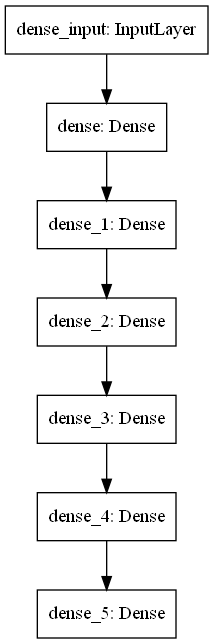

In [25]:
plot_model(model)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1048)              550200    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               537088    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 64        
Total params: 1,259,832
Trainable params: 1,259,832
Non-trainable params: 0
______________________________________________

In [27]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss=keras.losses.BinaryCrossentropy(),
            metrics=[keras.metrics.BinaryAccuracy()]
             )

In [28]:
import os 
model_dir='./model1'

log_dir=os.path.join('Q3_logs','tf_model')
os.makedirs(model_dir,exist_ok=True)
os.makedirs(log_dir,exist_ok=True)

FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: './model1'

In [29]:
model_cbk=keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp=keras.callbacks.ModelCheckpoint(model_dir+'/Best_model.h5',save_best_only=True)

In [30]:
train_x.shape

(4000, 524)

In [31]:
history=model.fit(train_x,train_y,batch_size=1000,epochs=150,
                  validation_data  =  (val_x,val_y),callbacks=[model_cbk,model_mckp]
                 )

Epoch 1/150
4/4 [==============================] - 1s 129ms/step - loss: 0.5931 - binary_accuracy: 0.7760 - val_loss: 0.3972 - val_binary_accuracy: 0.9750
Epoch 2/150
4/4 [==============================] - 0s 18ms/step - loss: 0.2618 - binary_accuracy: 0.9923 - val_loss: 0.0836 - val_binary_accuracy: 0.9990
Epoch 3/150
4/4 [==============================] - 0s 21ms/step - loss: 0.0335 - binary_accuracy: 0.9998 - val_loss: 0.0033 - val_binary_accuracy: 0.9990
Epoch 4/150
4/4 [==============================] - 0s 16ms/step - loss: 7.9104e-04 - binary_accuracy: 1.0000 - val_loss: 6.3589e-04 - val_binary_accuracy: 1.0000
Epoch 5/150
4/4 [==============================] - 0s 15ms/step - loss: 2.4610e-05 - binary_accuracy: 1.0000 - val_loss: 8.0834e-04 - val_binary_accuracy: 1.0000
Epoch 6/150
4/4 [==============================] - 0s 18ms/step - loss: 1.1787e-05 - binary_accuracy: 1.0000 - val_loss: 0.0019 - val_binary_accuracy: 0.9990
Epoch 7/150
4/4 [==============================] - 0s 1

In [32]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

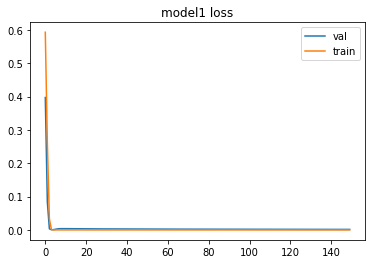

In [33]:
plt.plot(history.history['val_loss'],label='val')
plt.plot(history.history['loss'],label='train')

plt.title('model1 loss')
plt.legend()
plt.savefig('model1 loss.jpg')

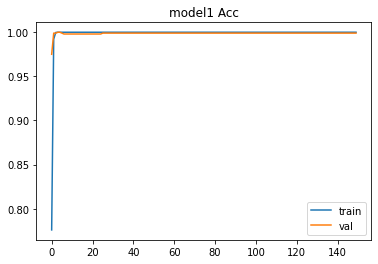

In [34]:
plt.plot(history.history['binary_accuracy'],label='train')
plt.plot(history.history['val_binary_accuracy'],label='val')

plt.title('model1 Acc')
plt.legend()
plt.savefig('Train_acc.jpg')

## model

In [35]:
model_2=keras.Sequential([layers.Dense(512,activation='relu',input_shape=(524,),use_bias=True),
                        # layers.Dense(512,activation='relu',use_bias=True),
                        layers.Dense(256,activation='relu',use_bias=True),# softmax
                        layers.Dense(128,activation='relu',use_bias=True),
                        layers.Dense(64,activation='relu',use_bias=True),
                        layers.Dense(32,activation='relu',use_bias=True),
                        layers.Dense(16,activation='relu',use_bias=True),
                        layers.Dense(1,activation='sigmoid',use_bias=False)])

model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss=keras.losses.BinaryCrossentropy(),
            metrics=[keras.metrics.BinaryAccuracy()]
             )

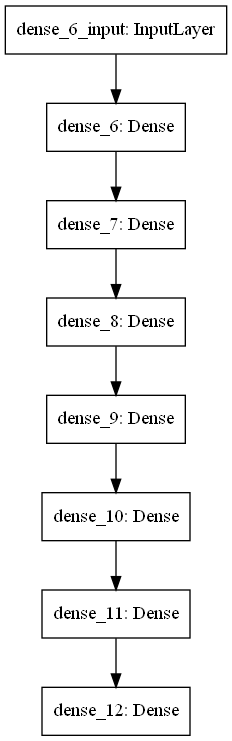

In [36]:
plot_model(model_2)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1048)              550200    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               537088    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 64        
Total params: 1,259,832
Trainable params: 1,259,832
Non-trainable params: 0
______________________________________________

In [38]:
import os 
model_dir='./model2'

log_dir=os.path.join('Q3_logs','tf_model2')
os.makedirs(model_dir,,exist_ok=True)
os.makedirs(log_dir,,exist_ok=True)

FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: './model2'

In [39]:
model_cbk=keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp=keras.callbacks.ModelCheckpoint(model_dir+'/Best_model.h5',save_best_only=True)
history_2=model_2.fit(train_x,train_y,batch_size=1000,epochs=150,
                  validation_data  =  (val_x,val_y),callbacks=[model_cbk,model_mckp]
                 )
history_2.history.keys()

Epoch 1/150
4/4 [==============================] - 1s 197ms/step - loss: 0.6564 - binary_accuracy: 0.7820 - val_loss: 0.5758 - val_binary_accuracy: 0.8820
Epoch 2/150
4/4 [==============================] - 0s 37ms/step - loss: 0.5125 - binary_accuracy: 0.8938 - val_loss: 0.3773 - val_binary_accuracy: 0.9350
Epoch 3/150
4/4 [==============================] - 0s 37ms/step - loss: 0.3005 - binary_accuracy: 0.9470 - val_loss: 0.1631 - val_binary_accuracy: 0.9900
Epoch 4/150
4/4 [==============================] - 0s 34ms/step - loss: 0.1019 - binary_accuracy: 0.9955 - val_loss: 0.0260 - val_binary_accuracy: 0.9990
Epoch 5/150
4/4 [==============================] - 0s 34ms/step - loss: 0.0111 - binary_accuracy: 1.0000 - val_loss: 0.0028 - val_binary_accuracy: 1.0000
Epoch 6/150
4/4 [==============================] - 0s 51ms/step - loss: 6.0401e-04 - binary_accuracy: 1.0000 - val_loss: 0.0013 - val_binary_accuracy: 1.0000
Epoch 7/150
4/4 [==============================] - 0s 47ms/step - loss:

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

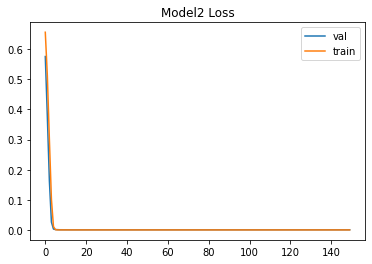

In [40]:
plt.plot(history_2.history['val_loss'],label='val')
plt.plot(history_2.history['loss'],label='train')

plt.title('Model2 Loss')
plt.legend()
plt.savefig('Train2_loss.jpg')


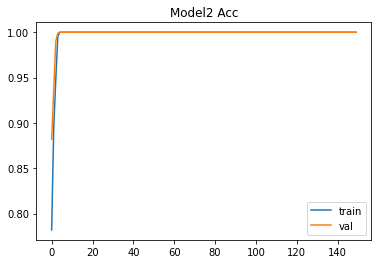

In [41]:
plt.plot(history_2.history['binary_accuracy'],label='train')
plt.plot(history_2.history['val_binary_accuracy'],label='val')

plt.title('Model2 Acc')
plt.legend()
plt.savefig('Train2_acc.jpg')

## model3

In [43]:
model_3=keras.Sequential([layers.Dense(1048,activation='relu',input_shape=(524,),use_bias=True),
                        layers.Dropout(0.1, seed=5),
                        layers.Dense(512,activation='relu',use_bias=True),
                        layers.Dropout(0.1, seed=5),
                        layers.Dense(256,activation='relu',use_bias=True),# softmax
                        layers.Dropout(0.1, seed=5),
                        layers.Dense(128,activation='relu',use_bias=True),
                        layers.Dropout(0.1, seed=5),
                        layers.Dense(64,activation='relu',use_bias=True),
                        layers.Dropout(0.1, seed=5),
                        layers.Dense(1,activation='sigmoid',use_bias=False)])

model_3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss=keras.losses.BinaryCrossentropy(),
            metrics=[keras.metrics.BinaryAccuracy()]
             )

In [46]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1048)              550200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               537088    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)              

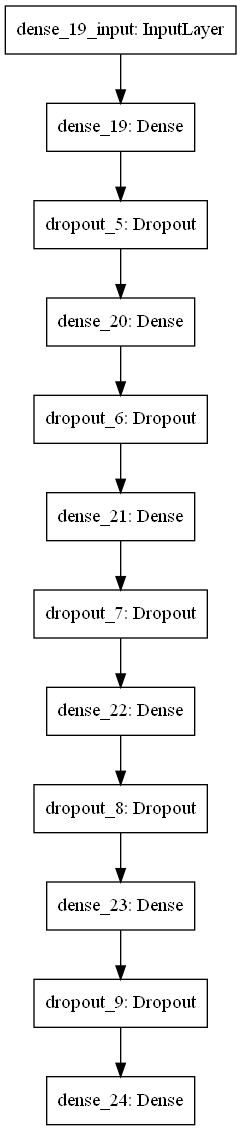

In [ ]:
plot_model(model_3)

In [69]:
import os 
model_dir='./model3'

log_dir=os.path.join('Q3_logs','tf_model3')
os.makedirs(model_dir,exist_ok=True)
os.makedirs(log_dir,exist_ok=True)

FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: 'Q3_logs\\tf_model3'

In [51]:
model_cbk=keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp=keras.callbacks.ModelCheckpoint(model_dir+'/Best_model.h5',save_best_only=True)
history_3=model_3.fit(train_x,train_y,batch_size=1000,epochs=150,
                  validation_data  =  (val_x,val_y),callbacks=[model_cbk,model_mckp]
                 )
history_3.history.keys()

Epoch 1/150
4/4 [==============================] - 1s 175ms/step - loss: 0.5854 - binary_accuracy: 0.7922 - val_loss: 0.3059 - val_binary_accuracy: 0.9550
Epoch 2/150
4/4 [==============================] - 0s 59ms/step - loss: 0.1792 - binary_accuracy: 0.9755 - val_loss: 0.0179 - val_binary_accuracy: 0.9970
Epoch 3/150
4/4 [==============================] - 0s 24ms/step - loss: 0.0110 - binary_accuracy: 0.9980 - val_loss: 0.0021 - val_binary_accuracy: 0.9990
Epoch 4/150
4/4 [==============================] - 0s 24ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - val_loss: 0.0014 - val_binary_accuracy: 0.9990
Epoch 5/150
4/4 [==============================] - 0s 26ms/step - loss: 8.2891e-05 - binary_accuracy: 1.0000 - val_loss: 0.0062 - val_binary_accuracy: 0.9980
Epoch 6/150
4/4 [==============================] - 0s 22ms/step - loss: 5.5847e-04 - binary_accuracy: 0.9998 - val_loss: 0.0010 - val_binary_accuracy: 0.9990
Epoch 7/150
4/4 [==============================] - 0s 26ms/step - l

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

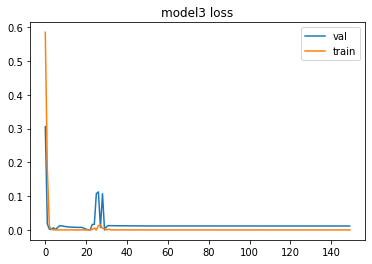

In [52]:
plt.plot(history_3.history['val_loss'],label='val')
plt.plot(history_3.history['loss'],label='train')

plt.title('model3 loss')
plt.legend()
plt.savefig('Train3_loss.jpg')


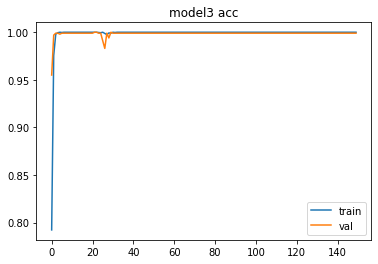

In [53]:
plt.plot(history_3.history['binary_accuracy'],label='train')
plt.plot(history_3.history['val_binary_accuracy'],label='val')

plt.title('model3 acc')
plt.legend()
plt.savefig('Train3_acc.jpg')

In [54]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [65]:
print('-'*15,"Accuracy",'-'*15)
print('\t\tmode1\tmodel2\tmodel3')
print('Train data\t{}\t{}\t{}'.format(history.history['binary_accuracy'][-1],history_2.history['binary_accuracy'][-1],history_3.history['binary_accuracy'][-1]))
print('Validation\t{:.4f}\t{:.4f}\t{:.4f}'.format(history.history['val_binary_accuracy'][-1],history_2.history['val_binary_accuracy'][-1],history_3.history['val_binary_accuracy'][-1]))

--------------- Accuracy ---------------
		mode1	model2	model3
Train data	1.0	1.0	1.0
Validation	0.9990	1.0000	0.9990


# 2.2.
(15%) Use your best network (out of 3 at least) to predict the intrusion type for the test set. Please report your results.

In [61]:
print('model1_loss:{}\tmodel2_loss:{}\tmodel_3loss:{}'.format(history.history['val_loss'][-1],history_2.history['val_loss'][-1],history_3.history['val_loss'][-1]))

model1_loss:0.0013340089935809374	model2_loss:0.0006816205568611622	model_3loss:1.2708395843219478e-05


In [68]:
pred= model_2.predict(test_x) 
model_res_test=pd.DataFrame( np.where(pred > 0.5, 'Web Attack', 'Access Control'))
# model_res_test_class='Web Attack' if pred>0.5 else 'Access Control'
model_res_test.to_csv('model_res_test.csv',header=False)


In [63]:
model_res_test.head()

,0
0,Access Control
1,Web Attack
2,Web Attack
3,Web Attack
4,Web Attack
